In [1]:
import ROOT as r

Welcome to JupyROOT 6.24/07


In [2]:
import matplotlib.pyplot as plt
import mplhep as hep
from root_numpy import hist2array

import json

In [3]:
testFileName = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

f = r.TFile.Open(testFileName)
tree = f.Get("Events")

Warning in <TClass::Init>: no dictionary for class __pair_base<edm::Hash<1>,edm::ParameterSetBlob> is available


In [4]:
hDijet01Masses = r.TH1F("dijet01m","",60,0,3000)
hDijet02Masses = r.TH1F("dijet02m","",60,0,3000)
hDijet12Masses = r.TH1F("dijet12m","",60,0,3000)
hTrijet012Masses = r.TH1F("trijetm","",60,0,3000)

nEvts = tree.GetEntriesFast()

for i in range(nEvts):    
    tree.GetEvent(i)
    
    
    if tree.nFatJet<3:
        continue
    
    pts     = tree.FatJet_pt
    etas    = tree.FatJet_eta
    phis    = tree.FatJet_phi
    masses  = tree.FatJet_msoftdrop
    
    with open("cuts.json", "r") as cuts:
        cuts_dict = json.load(cuts)
                        
    cuts_list = list(cuts_dict.values())
                    
    cut_pts = cuts_list[0]
    cut_etas = cuts_list[1]
    cut_masses = cuts_list[2]

    jet0Flag = pts[0]>cut_pts and abs(etas[0])<cut_etas  and masses[0]>cut_masses
    jet1Flag = pts[1]>cut_pts and abs(etas[1])<cut_etas  and masses[1]>cut_masses
    jet2Flag = pts[2]>cut_pts and abs(etas[2])<cut_etas  and masses[2]>cut_masses


    if not (jet0Flag and jet1Flag and jet2Flag):
        continue
    
    jet0 = r.TLorentzVector()
    jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])
    
    jet1 = r.TLorentzVector()
    jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])
    
    jet2 = r.TLorentzVector()
    jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])
    
    dijet01 = jet0 + jet1
    dijet02 = jet0 + jet2
    dijet12 = jet1 + jet2
    trijet012 = jet0 + jet1 + jet2
    
    hDijet01Masses.Fill(dijet01.M())
    hDijet02Masses.Fill(dijet02.M())
    hDijet12Masses.Fill(dijet12.M())
    hTrijet012Masses.Fill(trijet012.M())

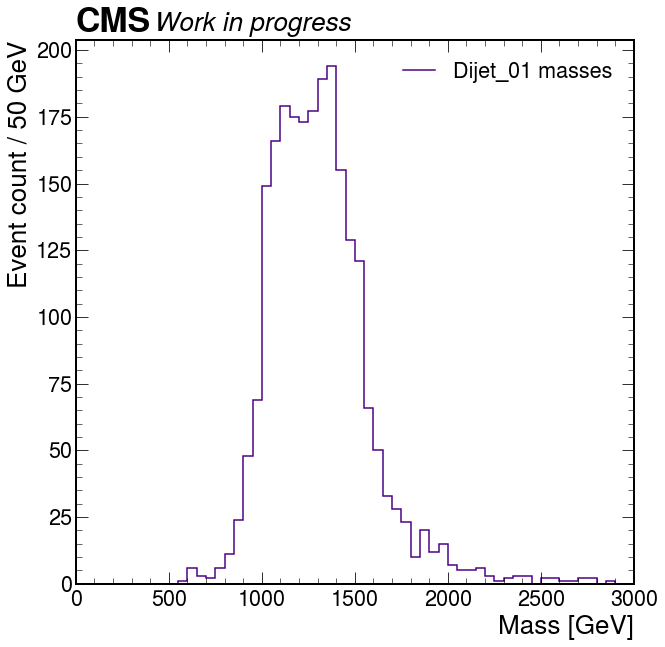

In [5]:
plt.style.use([hep.style.CMS])
counts, edges = hist2array(hDijet01Masses,return_edges=True)

edges = edges[0]
#It returns a list of arrays, where each array represents binning in one dimension. 
#We only work with 1D so we take edges[0]

hep.histplot(counts,edges,label="Dijet_01 masses", color = "indigo")
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 3000])
plt.legend()
plt.savefig("Dijet_01 masses.png")

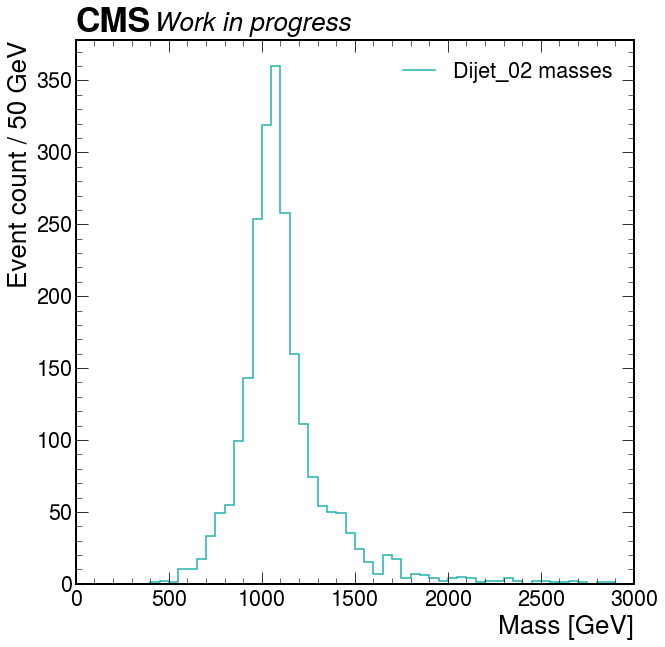

In [6]:
#dijet02

plt.style.use([hep.style.CMS])
counts, edges = hist2array(hDijet02Masses,return_edges=True)

edges = edges[0]
#It returns a list of arrays, where each array represents binning in one dimension. 
#We only work with 1D so we take edges[0]

hep.histplot(counts,edges,label="Dijet_02 masses", color="lightseagreen")
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 3000])
plt.legend()
plt.savefig("Dijet_02 masses.png")

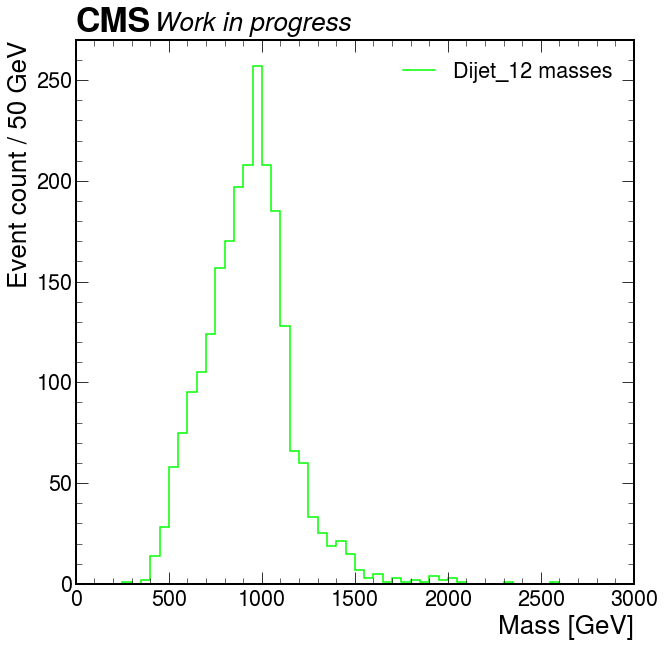

In [7]:
#dijet12

plt.style.use([hep.style.CMS])
counts1, edges1 = hist2array(hDijet12Masses,return_edges=True)

edges1 = edges1[0]
#It returns a list of arrays, where each array represents binning in one dimension. 
#We only work with 1D so we take edges[0]

hep.histplot(counts1,edges1,label="Dijet_12 masses", color="lime")
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 3000])
plt.legend()
plt.savefig("Dijet_12 masses.png")

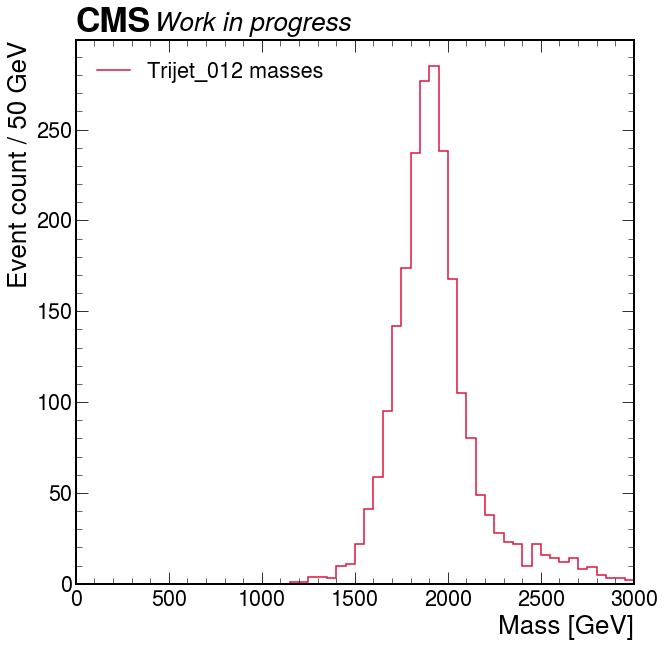

In [20]:
#trijet

plt.style.use([hep.style.CMS])
counts, edges = hist2array(hTrijet012Masses,return_edges=True)

edges = edges[0]
#It returns a list of arrays, where each array represents binning in one dimension. 
#We only work with 1D so we take edges[0]

hep.histplot(counts,edges,label="Trijet_012 masses", color="crimson")
hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 3000])
plt.legend(loc='upper left')
plt.savefig("Trijet_012 masses.png")

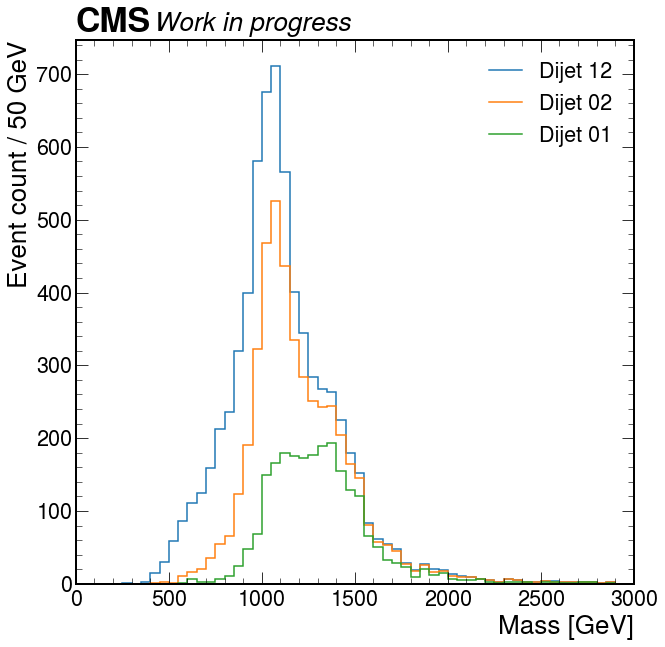

In [18]:
#all on one plot

#dijet01
dijet01, edges = hist2array(hDijet01Masses,return_edges=True)
dijet02, edges = hist2array(hDijet02Masses,return_edges=True)
dijet12, edges = hist2array(hDijet12Masses,return_edges=True)

edges = edges[0]

hep.histplot([dijet01,dijet02,dijet12],edges,label=["Dijet 01","Dijet 02","Dijet 12"],stack=True)

hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 3000])
plt.legend(loc='best')

plt.savefig("All_jets.png")